In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('fraud_risk_dataset.csv', header=0, index_col=0)
df.head()

,portfolio_id,product_term_credit_limit,NP,cash_intent,ALJ0300,ALJ0316,ALJ0416,ALJ5030,ALJ5320,ALJ5730,...,TSTU0910,TSTU2906,TSTU2907,TSTU2908,TSTU3906,TSTU3907,TSTU3908,TSTU4906,TSTU4907,TSTU4908
record_nb,,,,,,,,,,,,,,,,,,,,,
1,1908,500,0,0,2,1,1,33521,50283,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1908,500,0,0,0,98,98,999999998,999999998,999999998,...,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0
3,1908,500,0,0,1,0,0,999999997,999999997,999999997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1908,500,0,0,0,98,98,999999998,999999998,999999998,...,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0
5,1908,500,0,1,2,0,0,999999997,999999997,999999997,...,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0


In [3]:
from sklearn.preprocessing import RobustScaler, StandardScaler, normalize, OneHotEncoder

In [4]:
#fill the null values
ccfullData = df.fillna(0)
ccfullData.drop('NP', axis=1, inplace=True)

Dropping the categorical values to later convert these variables using one hot encoding and keeping only the continuous numeric variables for standardizing

In [5]:
x_b = ccfullData.drop(['portfolio_id','product_term_credit_limit','cash_intent','ALL9950','ALL9951','GLBDECS','ALL6310','ALL6320','MTF6326'],axis=1)

In [6]:
x_b.shape

(19030, 2319)

By using **RobustScaler()**, we can remove the outliers and then use either StandardScaler for preprocessing the dataset. 

In [7]:
scaler = RobustScaler()
scaled_x_b = scaler.fit_transform(x_b) 

In [8]:
scaler = StandardScaler()
scaled_ccfullData = scaler.fit_transform(scaled_x_b) 

In [9]:
scaler_df = pd.DataFrame(scaled_ccfullData)
scaler_df.shape

(19030, 2319)

Categorical variables are converted to one hot encoding

In [10]:
onehot = OneHotEncoder(sparse=False, drop= 'first', handle_unknown = 'error') 

onehot.fit(ccfullData.portfolio_id.to_numpy().reshape(-1,1))
year_onehot = onehot.transform(ccfullData.portfolio_id.to_numpy().reshape(-1,1))
year_onehot = pd.DataFrame(year_onehot, columns= onehot.get_feature_names(['portfolio_id']))

onehot.fit(ccfullData.product_term_credit_limit.to_numpy().reshape(-1,1))
product_term_onehot = onehot.transform(ccfullData.product_term_credit_limit.to_numpy().reshape(-1,1))
product_term_onehot = pd.DataFrame(product_term_onehot, columns= onehot.get_feature_names(['product_term_credit_limit']))

onehot.fit(ccfullData.cash_intent.to_numpy().reshape(-1,1))
cash_intent_onehot = onehot.transform(ccfullData.cash_intent.to_numpy().reshape(-1,1))
cash_intent_onehot = pd.DataFrame(cash_intent_onehot, columns= onehot.get_feature_names(['cash_intent']))

#Credit bureau attributes with Flag unit
onehot.fit(ccfullData.ALL9950.to_numpy().reshape(-1,1))
ALL9950_onehot = onehot.transform(ccfullData.ALL9950.to_numpy().reshape(-1,1))
ALL9950_onehot = pd.DataFrame(ALL9950_onehot, columns= onehot.get_feature_names(['ALL9950']))

onehot.fit(ccfullData.ALL9951.to_numpy().reshape(-1,1))
ALL9951_onehot = onehot.transform(ccfullData.ALL9951.to_numpy().reshape(-1,1))
ALL9951_onehot = pd.DataFrame(ALL9951_onehot, columns= onehot.get_feature_names(['ALL9951']))

onehot.fit(ccfullData.GLBDECS.to_numpy().reshape(-1,1))
GLBDECS_onehot = onehot.transform(ccfullData.GLBDECS.to_numpy().reshape(-1,1))
GLBDECS_onehot = pd.DataFrame(GLBDECS_onehot, columns= onehot.get_feature_names(['GLBDECS']))

#Credit bureau attributes with Rank unit
onehot.fit(ccfullData.ALL6310.to_numpy().reshape(-1,1))
ALL6310_onehot = onehot.transform(ccfullData.ALL6310.to_numpy().reshape(-1,1))
ALL6310_onehot = pd.DataFrame(ALL6310_onehot, columns= onehot.get_feature_names(['ALL6310']))

onehot.fit(ccfullData.ALL6320.to_numpy().reshape(-1,1))
ALL6320_onehot = onehot.transform(ccfullData.ALL6320.to_numpy().reshape(-1,1))
ALL6320_onehot = pd.DataFrame(ALL6320_onehot, columns= onehot.get_feature_names(['ALL6320']))

onehot.fit(ccfullData.MTF6326.to_numpy().reshape(-1,1))
MTF6326_onehot = onehot.transform(ccfullData.MTF6326.to_numpy().reshape(-1,1))
MTF6326_onehot = pd.DataFrame(MTF6326_onehot, columns= onehot.get_feature_names(['MTF6326']))


In [11]:
concatenated_dataframes = pd.concat(
    [
        year_onehot.reset_index(drop=True),
        product_term_onehot.reset_index(drop=True),
        cash_intent_onehot.reset_index(drop=True),
        ALL9950_onehot.reset_index(drop=True),
        ALL9951_onehot.reset_index(drop=True),
        GLBDECS_onehot.reset_index(drop=True),
        ALL6310_onehot.reset_index(drop=True),
        ALL6320_onehot.reset_index(drop=True),
        MTF6326_onehot.reset_index(drop=True),
        scaler_df.reset_index(drop=True)
    ],
    axis=1,
    ignore_index=True,
)

concatenated_dataframes_columns = [
    list(year_onehot.columns),
    list(product_term_onehot.columns),
    list(cash_intent_onehot.columns),
    list(ALL9950_onehot.columns),
    list(ALL9951_onehot.columns),
    list(GLBDECS_onehot.columns),
    list(ALL6310_onehot.columns),
    list(ALL6320_onehot.columns),
    list(MTF6326_onehot.columns),
    list(scaler_df.columns)
]
    
flatten = lambda nested_lists: [item for sublist in nested_lists for item in sublist]

concatenated_dataframes.columns = flatten(concatenated_dataframes_columns)

In [12]:
y = df['NP']

In [13]:
from sklearn import model_selection
from statistics import mean, stdev
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score,auc,roc_curve
import time

In [14]:
X = concatenated_dataframes
Y = y
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)
row_index = 0
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('XGBoost', XGBClassifier(eval_metric='mlogloss')))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

# Create StratifiedKFold object.    
tic = time.perf_counter()
for name, model in models:
    skfold = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=skfold, scoring=scoring)
    f1_results = model_selection.cross_val_score(model, X, Y, cv=skfold, scoring='f1')
    recall_results = model_selection.cross_val_score(model, X, Y, cv=skfold, scoring='recall')
    precision_results = model_selection.cross_val_score(model, X, Y, cv=skfold, scoring='precision')
    MLA_compare.loc[row_index,'MLA used'] = name
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(mean(cv_results), 4)
    MLA_compare.loc[row_index, 'Precision'] = round(mean(precision_results),4)
    MLA_compare.loc[row_index, 'Recall'] = round(mean(recall_results),4)
    MLA_compare.loc[row_index, 'f1'] = mean(f1_results)
    results.append(cv_results)
    names.append(name)
    # Print the output.
    print('List of possible accuracies for {0} is: {1}'.format(name, cv_results))
    print('List of possible Precision for {0} is: {1}'.format(name, precision_results))
    print('List of possible Recall for {0} is: {1}'.format(name, recall_results))
    print('List of possible F1 score for {0} is: {1}'.format(name, f1_results))
    msg = "%s: %f (%f)" % (name, mean(cv_results), cv_results.std())
    print(msg)
    toc = time.perf_counter()
    secs = toc - tic
    print("---Classifier %s use %0.4f seconds ---" %(name, secs))
    row_index+=1
    
MLA_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

List of possible accuracies for Logistic Regression is: [0.91671046 0.9224908  0.91644771 0.92170257 0.91749869]
List of possible Precision for Logistic Regression is: [0.59333333 0.65432099 0.60629921 0.68217054 0.58659218]
List of possible Recall for Logistic Regression is: [0.25797101 0.30724638 0.22318841 0.25507246 0.30434783]
List of possible F1 score for Logistic Regression is: [0.35959596 0.41814596 0.32627119 0.37130802 0.40076336]
Logistic Regression: 0.918970 (0.002588)
---Classifier Logistic Regression use 132.3159 seconds ---
List of possible accuracies for XGBoost is: [0.92433001 0.92485549 0.92643195 0.92143983 0.92616921]
List of possible Precision for XGBoost is: [0.72440945 0.70921986 0.77310924 0.71698113 0.72535211]
List of possible Recall for XGBoost is: [0.26666667 0.28985507 0.26666667 0.22028986 0.29855072]
List of possible F1 score for XGBoost is: [0.38983051 0.41152263 0.39655172 0.33702882 0.42299795]
XGBoost: 0.924645 (0.001785)
---Classifier XGBoost use 114

,MLA used,Test Accuracy,Precision,Recall,f1
1,XGBoost,0.9246,0.7298,0.2684,0.391586
0,Logistic Regression,0.9190,0.6245,0.2696,0.375217


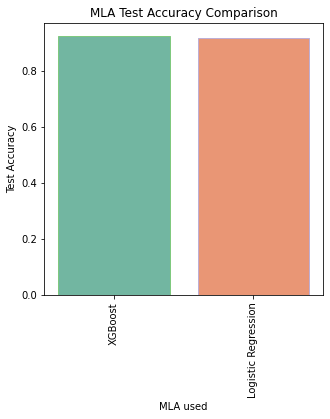

In [17]:
# Creating plot to show the train accuracy
plt.subplots(figsize=(5,5))
sns.barplot(x="MLA used", y="Test Accuracy",data=MLA_compare,palette='Set2',edgecolor=sns.color_palette('Accent',7))
plt.xticks(rotation=90)
plt.title('MLA Test Accuracy Comparison')
plt.show()